In [2]:
from keras.datasets import mnist
from keras.utils import np_utils
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(10)

In [4]:
(x_train,y_train),(x_test,y_test) = mnist.load_data()

11493376/11490434 [==============================] - 25s 2us/step


In [5]:
x_train.shape

(60000, 28, 28)

In [23]:
x_train4D = x_train.reshape(x_train.shape[0],28,28,1).astype('float32')
x_test4D = x_test.reshape(x_test.shape[0],28,28,1).astype('float32')


In [24]:
x_train4D_normalize = x_train4D/255
x_test4D_normalize = x_test4D/255

In [9]:
y_trainonehot = np_utils.to_categorical(y_train)
y_testonehot = np_utils.to_categorical(y_test)

In [10]:
from keras.models import Sequential
from keras.layers import Dense,Dropout,Flatten,Conv2D,MaxPooling2D

In [11]:
model = Sequential()

In [12]:
model.add(Conv2D(filters=16,kernel_size=(5,5),
                input_shape = (28,28,1),
                activation = 'relu',
                padding='same'))

In [13]:
model.add(MaxPooling2D(pool_size=(2,2)))

In [14]:
model.add(Conv2D(filters=36,kernel_size=(5,5),
                activation = 'relu',
                padding='same'))

In [15]:
model.add(MaxPooling2D(pool_size=(2,2)))

In [16]:
model.add(Dropout(0.25))

In [17]:
model.add(Flatten())

In [18]:
model.add(Dense(128,activation='relu'))

In [19]:
model.add(Dropout(0.5))

In [20]:
model.add(Dense(10,activation='softmax'))

In [21]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 16)        416       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 36)        14436     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 7, 7, 36)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 7, 7, 36)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1764)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               225920    
__________

In [22]:
model.compile(loss = 'categorical_crossentropy',
              optimizer = 'adam',metrics = ['accuracy'])

In [26]:
train_history = model.fit(x = x_train4D_normalize,y = y_trainonehot,validation_split=0.2,epochs=10,batch_size=300,verbose=1)

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
48000/48000 [==============================] - 20s 419us/step - loss: 0.1210 - acc: 0.9635 - val_loss: 0.0604 - val_acc: 0.9818
Epoch 2/10
48000/48000 [==============================] - 19s 400us/step - loss: 0.0949 - acc: 0.9711 - val_loss: 0.0494 - val_acc: 0.9855
Epoch 3/10
48000/48000 [==============================] - 19s 402us/step - loss: 0.0769 - acc: 0.9762 - val_loss: 0.0459 - val_acc: 0.9863
Epoch 4/10
48000/48000 [==============================] - 19s 400us/step - loss: 0.0665 - acc: 0.9799 - val_loss: 0.0397 - val_acc: 0.9888
Epoch 5/10
48000/48000 [==============================] - 19s 402us/step - loss: 0.0603 - acc: 0.9815 - val_loss: 0.0377 - val_acc: 0.9883
Epoch 6/10
48000/48000 [==============================] - 19s 402us/step - loss: 0.0519 - acc: 0.9842 - val_loss: 0.0343 - val_acc: 0.9903
Epoch 7/10
48000/48000 [==============================] - 20s 414us/step - loss: 0.0485 - acc: 0.9853 - val_loss: 0.

In [27]:
def plot_images_labels_prediction(images,labels,prediction,idx,num=10):
    
    fig = plt.gcf()
    fig.set_size_inches(12,14)
    if num>25:num=25
    for i in range(0,num):
        ax = plt.subplot(5,5,1+i)
        ax.imshow(images[idx],cmap='binary')
        title = "label = " + str(labels[idx])
        if len(prediction)>0:
            title += ",prediction="+str(prediction[idx])
        ax.set_title(title,fontsize=10)
        ax.set_xticks([])
        ax.set_yticks([])
        idx+=1
    plt.show()
def show_train_history(train_history,train,validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train History')
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['train','validation'],loc='upper left')
    plt.show()

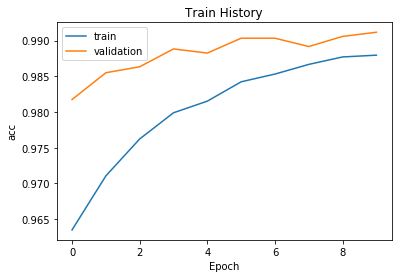

In [28]:
show_train_history(train_history,'acc','val_acc')

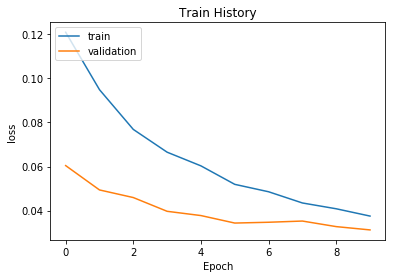

In [29]:
show_train_history(train_history,'loss','val_loss')

In [30]:
prediction = model.predict_classes(x_test4D_normalize)

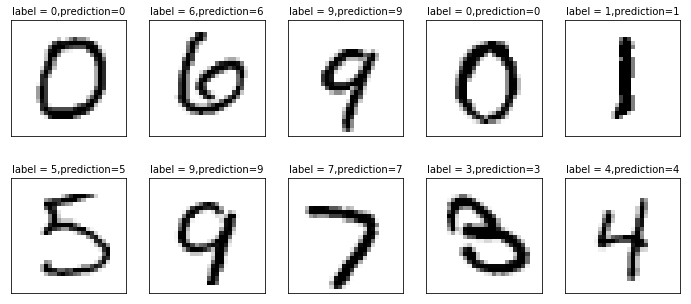

In [31]:
plot_images_labels_prediction(x_test,y_test,prediction,10)

In [34]:
import pandas as pd
pd.crosstab(y_test,prediction,rownames=['label'],colnames=['predict'])

predict,0,1,2,3,4,5,6,7,8,9
label,,,,,,,,,,
0,976,1,0,0,0,0,1,1,1,0
1,0,1131,1,0,0,0,1,1,1,0
2,1,0,1029,0,0,0,0,2,0,0
3,0,0,0,1003,0,3,0,2,2,0
4,0,0,0,0,979,0,0,0,1,2
5,1,0,0,4,0,885,1,0,0,1
6,7,2,0,0,2,2,944,0,1,0
7,0,1,6,1,0,0,0,1018,1,1
8,3,0,2,2,0,0,0,2,963,2
